In [1]:
import numpy as np
import scipy as sp
from statsmodels.tsa.arima.model import ARIMA
import math
from matplotlib import pyplot as plt

In [2]:
#Split normal density
def split_normal_density(x, mode, sigma1, sigma2):

    C = math.sqrt(2/math.pi)/(sigma1 + sigma2)
    
    mark = (x > mode)

    f = C * np.exp(-1/(2*sigma1**2)*(x - mode)**2)

    f[mark] = C * np.exp(-1/(2*sigma2**2)*(x[mark] - mode)**2)

    return f

# Split normal cdf
def p_split_normal(p, alpha, mode, sigma, skew):

    sigma1 = math.sqrt(var0/(1 + skew))
    sigma2 = math.sqrt(var0/(1 - skew))

    C = math.sqrt(2/math.pi)/(sigma1 + sigma2)

    k = x

    mark = (k > mode)

    p = (c * math.sqrt(2 * math.pi) * sigma1 * sp.stats.norm.cdf((k - mode[k1])/sigma1))

    p[mark] = (1 - c * sqrt(2 * math.pi) * sigma2 * (1 - sp.stats.norm.cdf((k[mark] - mode)/sigma2)))

    return p

# Split normal quantile
def q_split_normal(alpha, mode, sigma, skew):
    sigma1 = math.sqrt(var0/(1 + skew))
    sigma2 = math.sqrt(var0/(1 - skew))

    C = math.sqrt(2/math.pi)/(sigma1 + sigma2)

    p = p_split_normal(mode, mode, sigma, skew) 

    mark = alpha > p

    q = (mode + sigma1 * sp.stats.norm.ppf( alpha/(c * math.sqrt(2 * math.pi) * sigma1)))

    q[mark] = (mode + sigma2 * sp.stats.norm.ppf((alpha + c * math.sqrt(2 * math.pi) * sigma2 - 1)/(c * math.sqrt(2 * math.pi) * sigma2)))
    
    return q

# Split normal random number
def r_split_normal(n, mode, sigma, skew):

    u = np.random.uniform(size=n)

    r = q_split_normal(n, mode, sigma, skew)

    return r



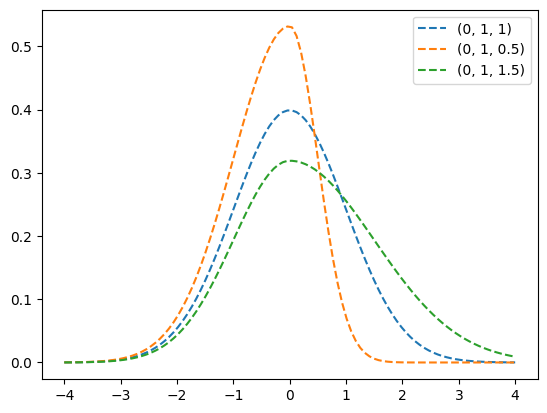

In [3]:
params_list = [[0, 1, 1, "(0, 1, 1)"], [0, 1, 0.5, "(0, 1, 0.5)"], [0, 1, 1.5, "(0, 1, 1.5)"]]

x = np.linspace(-4, 4, 100)

for params in params_list:
    mu, sigma1, sigma2, lab = params
    y = split_normal_density(x, mu, sigma1, sigma2)
    plt.plot(x, y, '--', label = lab)
plt.legend()
plt.show()

In [4]:
n = 1500
np.random.seed(42)
et = np.random.normal(size=n)
yt = np.array([np.nan]*n)
alpha = 1
beta = 0.8

yt[0] = alpha + et[0]

for i in range(1,n):
    yt[i] = alpha + beta*yt[i-1] + et[i]

# import pandas as pd
# from datetime import datetime

# yt = pd.read_csv("gdp.csv")

# yt['GDPGR'] = 400*(yt['GDP'] - yt['GDP'].shift(1))

# plt.plot(range(0,len(yt['GDP'])),yt['GDP'])
# plt.show()

In [5]:
ar1 = ARIMA(list(yt.iloc[7:231-1,:]['GDPGR']),order=(1,0,0), trend='c').fit()
ar1.summary()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
ar1.forecast()

In [ ]:
ar1.forecast(signal_only=True)

In [ ]:
ar1.predict(dynamic=False, typ='levels')

In [ ]:
ar1.predict(signal_only=True)

In [ ]:
ar1.forecast(100)

In [ ]:
ar1.forecast(100, signal_only=True)